In [1]:
from pylab import rcParams

rcParams['figure.figsize'] = 10,10

# 6.1.2

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

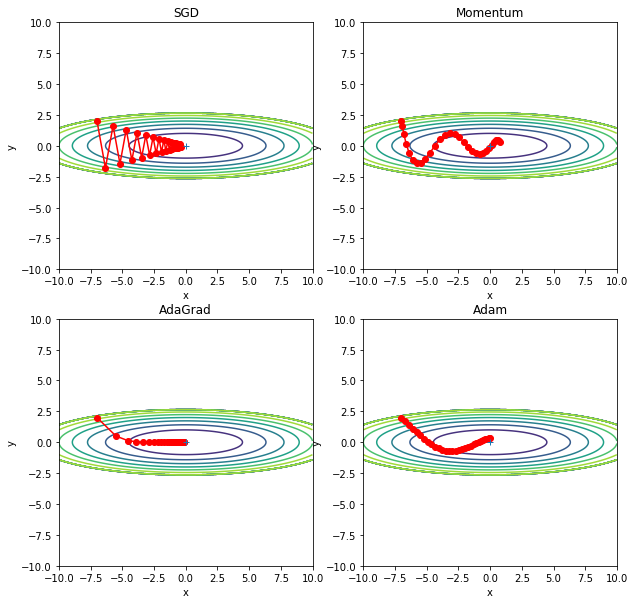

In [3]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_naive.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3592347443073933
Momentum:2.299165089451933
AdaGrad:2.528395420230961
Adam:2.2211726192697814
===========iteration:100===========
SGD:1.644655287754814
Momentum:0.29753104514654394
AdaGrad:0.14314118828961836
Adam:0.18721194677629163
===========iteration:200===========
SGD:0.8612184304373143
Momentum:0.26156157244469297
AdaGrad:0.1137803475989215
Adam:0.1558700805025833
===========iteration:300===========
SGD:0.5108062257531638
Momentum:0.18915404543737913
AdaGrad:0.0659700243422147
Adam:0.11345969634245685
===========iteration:400===========
SGD:0.45104743125554425
Momentum:0.24735064447472793
AdaGrad:0.09608008368647637
Adam:0.16219605154081104
===========iteration:500===========
SGD:0.3376005201930524
Momentum:0.22611645476517897
AdaGrad:0.09010675783845053
Adam:0.14961044612704644
===========iteration:600===========
SGD:0.3157052077200677
Momentum:0.17143625231850199
AdaGrad:0.09281580952038035
Adam:0.15977460193742365
===========iteration:70

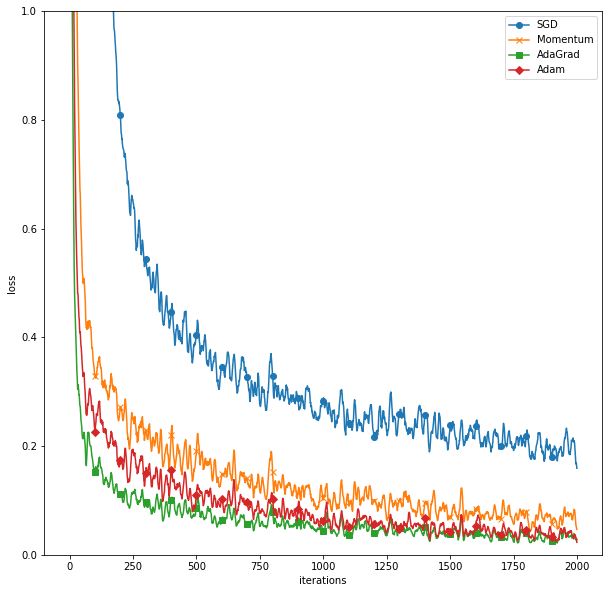

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

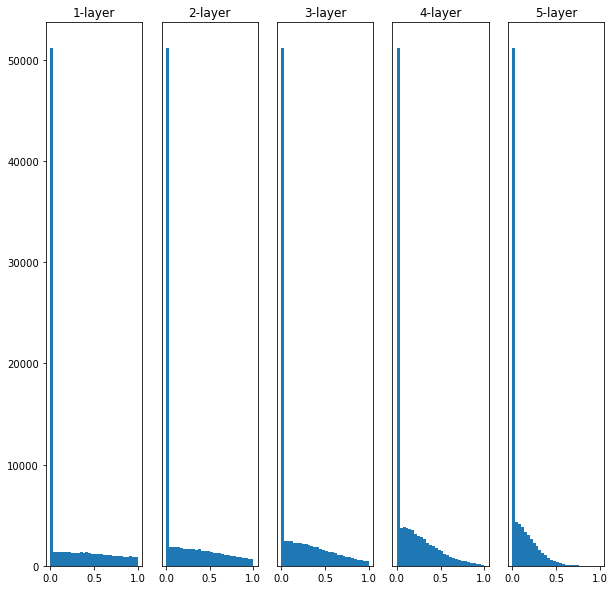

In [5]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py

# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302547299161724
Xavier:2.2960745545352674
He:2.358761431487468
===========iteration:100===========
std=0.01:2.3026327982460484
Xavier:2.2385589997049085
He:1.5605316008017807
===========iteration:200===========
std=0.01:2.3024707248303216
Xavier:2.054898206362171
He:0.8208992358458165
===========iteration:300===========
std=0.01:2.30111308083444
Xavier:1.7233239449761593
He:0.5488270883957738
===========iteration:400===========
std=0.01:2.3002035177992117
Xavier:1.2732240168825115
He:0.3518889668371091
===========iteration:500===========
std=0.01:2.3019399353035706
Xavier:0.8203475888578768
He:0.30819613400811324
===========iteration:600===========
std=0.01:2.2991269684208646
Xavier:0.6066405169624762
He:0.3188237759951062
===========iteration:700===========
std=0.01:2.2997672041943695
Xavier:0.6454107565028997
He:0.30250390299114727
===========iteration:800===========
std=0.01:2.3003826933615286
Xavier:0.5419140445326309
He:0.31893100590082

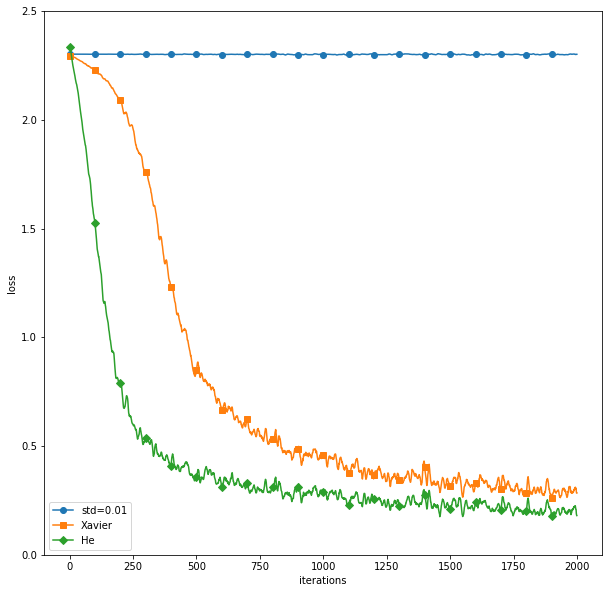

In [6]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/weight_init_compare.py

# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.097 - 0.092
epoch:1 | 0.097 - 0.099
epoch:2 | 0.097 - 0.113


/home/jovyan/work/Documents/GitHub/zero-deeplearning/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/home/jovyan/work/Documents/GitHub/zero-deeplearning/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/home/jovyan/work/Documents/GitHub/zero-deeplearning/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:3 | 0.097 - 0.134
epoch:4 | 0.097 - 0.142
epoch:5 | 0.097 - 0.163
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.196
epoch:8 | 0.097 - 0.224
epoch:9 | 0.097 - 0.231
epoch:10 | 0.097 - 0.241
epoch:11 | 0.097 - 0.255
epoch:12 | 0.097 - 0.276
epoch:13 | 0.097 - 0.275
epoch:14 | 0.097 - 0.31
epoch:15 | 0.097 - 0.321
epoch:16 | 0.097 - 0.333
epoch:17 | 0.097 - 0.341
epoch:18 | 0.097 - 0.361


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.362
============== 2/16 ==============
epoch:0 | 0.099 - 0.108
epoch:1 | 0.097 - 0.097
epoch:2 | 0.097 - 0.126


/home/jovyan/work/Documents/GitHub/zero-deeplearning/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.139
epoch:5 | 0.097 - 0.171
epoch:6 | 0.097 - 0.192
epoch:7 | 0.097 - 0.21
epoch:8 | 0.097 - 0.24
epoch:9 | 0.097 - 0.25
epoch:10 | 0.097 - 0.276
epoch:11 | 0.097 - 0.286
epoch:12 | 0.097 - 0.31
epoch:13 | 0.097 - 0.337
epoch:14 | 0.097 - 0.352
epoch:15 | 0.097 - 0.387
epoch:16 | 0.097 - 0.396
epoch:17 | 0.097 - 0.42
epoch:18 | 0.097 - 0.437


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.458
============== 3/16 ==============
epoch:0 | 0.095 - 0.102
epoch:1 | 0.381 - 0.135
epoch:2 | 0.509 - 0.164
epoch:3 | 0.621 - 0.194
epoch:4 | 0.686 - 0.225
epoch:5 | 0.754 - 0.251
epoch:6 | 0.791 - 0.292
epoch:7 | 0.835 - 0.327
epoch:8 | 0.856 - 0.371
epoch:9 | 0.897 - 0.415
epoch:10 | 0.918 - 0.447
epoch:11 | 0.93 - 0.466
epoch:12 | 0.949 - 0.496
epoch:13 | 0.959 - 0.525
epoch:14 | 0.966 - 0.563
epoch:15 | 0.972 - 0.575
epoch:16 | 0.98 - 0.599
epoch:17 | 0.985 - 0.623


No handles with labels found to put in legend.


epoch:18 | 0.983 - 0.636
epoch:19 | 0.989 - 0.648
============== 4/16 ==============
epoch:0 | 0.141 - 0.114
epoch:1 | 0.237 - 0.151
epoch:2 | 0.386 - 0.218
epoch:3 | 0.474 - 0.287
epoch:4 | 0.548 - 0.345
epoch:5 | 0.6 - 0.398
epoch:6 | 0.648 - 0.455
epoch:7 | 0.691 - 0.503
epoch:8 | 0.71 - 0.559
epoch:9 | 0.738 - 0.591
epoch:10 | 0.753 - 0.626
epoch:11 | 0.772 - 0.658
epoch:12 | 0.792 - 0.677
epoch:13 | 0.803 - 0.703
epoch:14 | 0.81 - 0.716
epoch:15 | 0.823 - 0.734
epoch:16 | 0.828 - 0.74
epoch:17 | 0.841 - 0.758


No handles with labels found to put in legend.


epoch:18 | 0.855 - 0.771
epoch:19 | 0.863 - 0.789
============== 5/16 ==============
epoch:0 | 0.104 - 0.106
epoch:1 | 0.108 - 0.152
epoch:2 | 0.114 - 0.32
epoch:3 | 0.117 - 0.432
epoch:4 | 0.12 - 0.495
epoch:5 | 0.119 - 0.553
epoch:6 | 0.13 - 0.607
epoch:7 | 0.139 - 0.656
epoch:8 | 0.145 - 0.693
epoch:9 | 0.164 - 0.722
epoch:10 | 0.168 - 0.748
epoch:11 | 0.166 - 0.77
epoch:12 | 0.182 - 0.798
epoch:13 | 0.194 - 0.816
epoch:14 | 0.198 - 0.831
epoch:15 | 0.19 - 0.846
epoch:16 | 0.195 - 0.859
epoch:17 | 0.194 - 0.863


No handles with labels found to put in legend.


epoch:18 | 0.191 - 0.873
epoch:19 | 0.204 - 0.88
============== 6/16 ==============
epoch:0 | 0.123 - 0.115
epoch:1 | 0.116 - 0.252
epoch:2 | 0.116 - 0.429
epoch:3 | 0.116 - 0.592
epoch:4 | 0.116 - 0.684
epoch:5 | 0.116 - 0.749
epoch:6 | 0.12 - 0.791
epoch:7 | 0.116 - 0.816
epoch:8 | 0.116 - 0.839
epoch:9 | 0.116 - 0.852
epoch:10 | 0.116 - 0.863
epoch:11 | 0.116 - 0.876
epoch:12 | 0.156 - 0.885
epoch:13 | 0.118 - 0.899
epoch:14 | 0.128 - 0.907
epoch:15 | 0.143 - 0.92
epoch:16 | 0.144 - 0.922
epoch:17 | 0.118 - 0.93


No handles with labels found to put in legend.


epoch:18 | 0.131 - 0.937
epoch:19 | 0.12 - 0.942
============== 7/16 ==============
epoch:0 | 0.097 - 0.108
epoch:1 | 0.117 - 0.284
epoch:2 | 0.117 - 0.604
epoch:3 | 0.117 - 0.704
epoch:4 | 0.117 - 0.752
epoch:5 | 0.117 - 0.79
epoch:6 | 0.117 - 0.84
epoch:7 | 0.117 - 0.859
epoch:8 | 0.117 - 0.9
epoch:9 | 0.117 - 0.915
epoch:10 | 0.117 - 0.94
epoch:11 | 0.117 - 0.952
epoch:12 | 0.117 - 0.96
epoch:13 | 0.117 - 0.965
epoch:14 | 0.117 - 0.975
epoch:15 | 0.117 - 0.977
epoch:16 | 0.117 - 0.979
epoch:17 | 0.117 - 0.982


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.985
epoch:19 | 0.117 - 0.99
============== 8/16 ==============
epoch:0 | 0.117 - 0.122
epoch:1 | 0.117 - 0.385
epoch:2 | 0.117 - 0.603
epoch:3 | 0.097 - 0.731
epoch:4 | 0.117 - 0.798
epoch:5 | 0.117 - 0.867
epoch:6 | 0.117 - 0.903
epoch:7 | 0.117 - 0.933
epoch:8 | 0.117 - 0.954
epoch:9 | 0.117 - 0.969
epoch:10 | 0.117 - 0.975
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.116 - 0.122
epoch:1 | 0.116 - 0.476
epoch:2 | 0.116 - 0.675
epoch:3 | 0.116 - 0.79
epoch:4 | 0.116 - 0.852
epoch:5 | 0.116 - 0.917
epoch:6 | 0.116 - 0.941
epoch:7 | 0.116 - 0.977
epoch:8 | 0.116 - 0.981
epoch:9 | 0.116 - 0.991
epoch:10 | 0.116 - 0.996
epoch:11 | 0.116 - 0.996
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.141
epoch:1 | 0.116 - 0.565
epoch:2 | 0.117 - 0.698
epoch:3 | 0.117 - 0.729
epoch:4 | 0.116 - 0.758
epoch:5 | 0.117 - 0.767
epoch:6 | 0.117 - 0.773
epoch:7 | 0.117 - 0.789
epoch:8 | 0.117 - 0.819
epoch:9 | 0.117 - 0.885
epoch:10 | 0.116 - 0.892
epoch:11 | 0.116 - 0.901
epoch:12 | 0.116 - 0.903
epoch:13 | 0.116 - 0.902
epoch:14 | 0.116 - 0.985
epoch:15 | 0.116 - 0.992
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 0.999
============== 11/16 ==============
epoch:0 | 0.117 - 0.181
epoch:1 | 0.116 - 0.611
epoch:2 | 0.116 - 0.645
epoch:3 | 0.105 - 0.785
epoch:4 | 0.116 - 0.886
epoch:5 | 0.116 - 0.88
epoch:6 | 0.116 - 0.951
epoch:7 | 0.116 - 0.919
epoch:8 | 0.116 - 0.949
epoch:9 | 0.116 - 0.976
epoch:10 | 0.116 - 0.98
epoch:11 | 0.116 - 0.99
epoch:12 | 0.116 - 0.982
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.992
epoch:16 | 0.116 - 0.993
epoch:17 | 0.116 - 0.994


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.995
epoch:19 | 0.116 - 0.995
============== 12/16 ==============
epoch:0 | 0.117 - 0.233
epoch:1 | 0.116 - 0.509
epoch:2 | 0.116 - 0.661
epoch:3 | 0.117 - 0.598
epoch:4 | 0.117 - 0.682
epoch:5 | 0.117 - 0.687
epoch:6 | 0.117 - 0.703
epoch:7 | 0.117 - 0.706
epoch:8 | 0.117 - 0.796
epoch:9 | 0.117 - 0.718
epoch:10 | 0.117 - 0.877
epoch:11 | 0.117 - 0.859
epoch:12 | 0.117 - 0.887
epoch:13 | 0.117 - 0.844
epoch:14 | 0.117 - 0.89
epoch:15 | 0.117 - 0.871
epoch:16 | 0.117 - 0.897
epoch:17 | 0.117 - 0.903


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.898
epoch:19 | 0.117 - 0.898
============== 13/16 ==============
epoch:0 | 0.094 - 0.182
epoch:1 | 0.117 - 0.35
epoch:2 | 0.117 - 0.452
epoch:3 | 0.117 - 0.541
epoch:4 | 0.117 - 0.531
epoch:5 | 0.117 - 0.528
epoch:6 | 0.117 - 0.574
epoch:7 | 0.116 - 0.601
epoch:8 | 0.116 - 0.548
epoch:9 | 0.116 - 0.545
epoch:10 | 0.116 - 0.566
epoch:11 | 0.116 - 0.609
epoch:12 | 0.116 - 0.607
epoch:13 | 0.116 - 0.614
epoch:14 | 0.116 - 0.615
epoch:15 | 0.116 - 0.603
epoch:16 | 0.116 - 0.618
epoch:17 | 0.116 - 0.617


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.618
epoch:19 | 0.116 - 0.619
============== 14/16 ==============
epoch:0 | 0.093 - 0.165
epoch:1 | 0.117 - 0.279
epoch:2 | 0.116 - 0.391
epoch:3 | 0.117 - 0.448
epoch:4 | 0.117 - 0.496
epoch:5 | 0.116 - 0.505
epoch:6 | 0.116 - 0.479
epoch:7 | 0.116 - 0.507
epoch:8 | 0.116 - 0.51
epoch:9 | 0.116 - 0.51
epoch:10 | 0.116 - 0.511
epoch:11 | 0.116 - 0.611
epoch:12 | 0.116 - 0.494
epoch:13 | 0.116 - 0.606
epoch:14 | 0.116 - 0.616
epoch:15 | 0.116 - 0.614
epoch:16 | 0.116 - 0.617
epoch:17 | 0.116 - 0.617


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.618
epoch:19 | 0.116 - 0.649
============== 15/16 ==============
epoch:0 | 0.105 - 0.182
epoch:1 | 0.117 - 0.351
epoch:2 | 0.117 - 0.338
epoch:3 | 0.117 - 0.41
epoch:4 | 0.117 - 0.416
epoch:5 | 0.117 - 0.411
epoch:6 | 0.117 - 0.448
epoch:7 | 0.117 - 0.496
epoch:8 | 0.117 - 0.514
epoch:9 | 0.117 - 0.512
epoch:10 | 0.117 - 0.514
epoch:11 | 0.117 - 0.526
epoch:12 | 0.117 - 0.513
epoch:13 | 0.117 - 0.522
epoch:14 | 0.117 - 0.529
epoch:15 | 0.117 - 0.53
epoch:16 | 0.117 - 0.533
epoch:17 | 0.117 - 0.533


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.593
epoch:19 | 0.117 - 0.614
============== 16/16 ==============
epoch:0 | 0.087 - 0.087
epoch:1 | 0.116 - 0.144
epoch:2 | 0.116 - 0.316
epoch:3 | 0.117 - 0.314
epoch:4 | 0.117 - 0.326
epoch:5 | 0.116 - 0.32
epoch:6 | 0.117 - 0.322
epoch:7 | 0.117 - 0.328
epoch:8 | 0.117 - 0.328
epoch:9 | 0.117 - 0.326
epoch:10 | 0.117 - 0.329
epoch:11 | 0.117 - 0.4
epoch:12 | 0.117 - 0.429
epoch:13 | 0.117 - 0.431
epoch:14 | 0.117 - 0.411
epoch:15 | 0.117 - 0.431
epoch:16 | 0.117 - 0.43
epoch:17 | 0.117 - 0.432
epoch:18 | 0.117 - 0.428
epoch:19 | 0.117 - 0.426


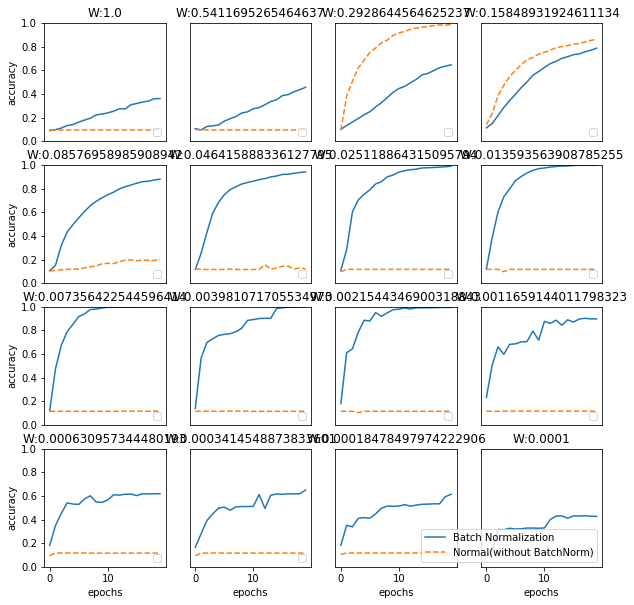

In [7]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/batch_norm_test.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.06666666666666667, test acc:0.0759
epoch:1, train acc:0.09333333333333334, test acc:0.0817
epoch:2, train acc:0.11333333333333333, test acc:0.0901
epoch:3, train acc:0.14, test acc:0.1015
epoch:4, train acc:0.18333333333333332, test acc:0.1192
epoch:5, train acc:0.2, test acc:0.136
epoch:6, train acc:0.24, test acc:0.1541
epoch:7, train acc:0.2866666666666667, test acc:0.1788
epoch:8, train acc:0.30666666666666664, test acc:0.201
epoch:9, train acc:0.33666666666666667, test acc:0.2229
epoch:10, train acc:0.37, test acc:0.2481
epoch:11, train acc:0.39666666666666667, test acc:0.265
epoch:12, train acc:0.4166666666666667, test acc:0.2809
epoch:13, train acc:0.41333333333333333, test acc:0.2948
epoch:14, train acc:0.44666666666666666, test acc:0.3134
epoch:15, train acc:0.45, test acc:0.3256
epoch:16, train acc:0.45666666666666667, test acc:0.337
epoch:17, train acc:0.4633333333333333, test acc:0.3507
epoch:18, train acc:0.49, test acc:0.3576
epoch:19, train acc:0.5, 

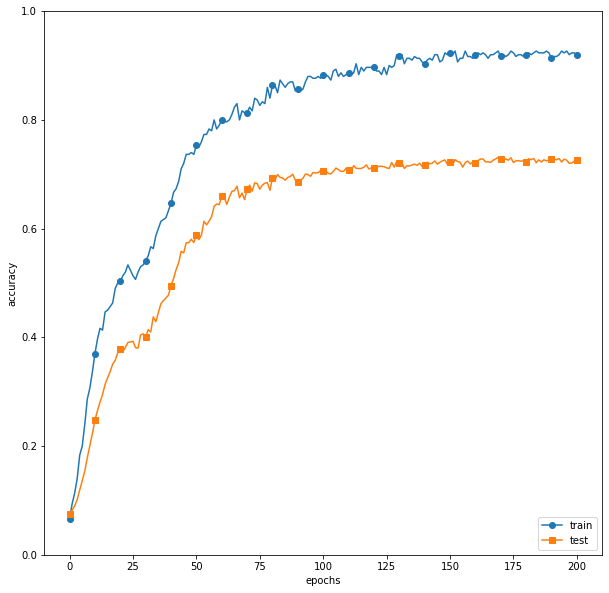

In [8]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 6.4.3

In [9]:
class DropOut:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask
    

train loss:2.282761614328705
=== epoch:1, train acc:0.10333333333333333, test acc:0.0973 ===
train loss:2.296839302963535
train loss:2.311973115130556
train loss:2.289780818311283
=== epoch:2, train acc:0.10666666666666667, test acc:0.0983 ===
train loss:2.2925835580423666
train loss:2.287840465469772
train loss:2.2928275300261487
=== epoch:3, train acc:0.11, test acc:0.0991 ===
train loss:2.2902074113026485
train loss:2.2902312867891093
train loss:2.319676900236293
=== epoch:4, train acc:0.10666666666666667, test acc:0.1024 ===
train loss:2.289222799383083
train loss:2.28444594034088
train loss:2.2947463451919843
=== epoch:5, train acc:0.11666666666666667, test acc:0.1041 ===
train loss:2.30145070854192
train loss:2.2918271785997204
train loss:2.275494831167473
=== epoch:6, train acc:0.12333333333333334, test acc:0.1055 ===
train loss:2.289117960725022
train loss:2.2830726601170213
train loss:2.3018801626281387
=== epoch:7, train acc:0.13, test acc:0.1093 ===
train loss:2.291278445011

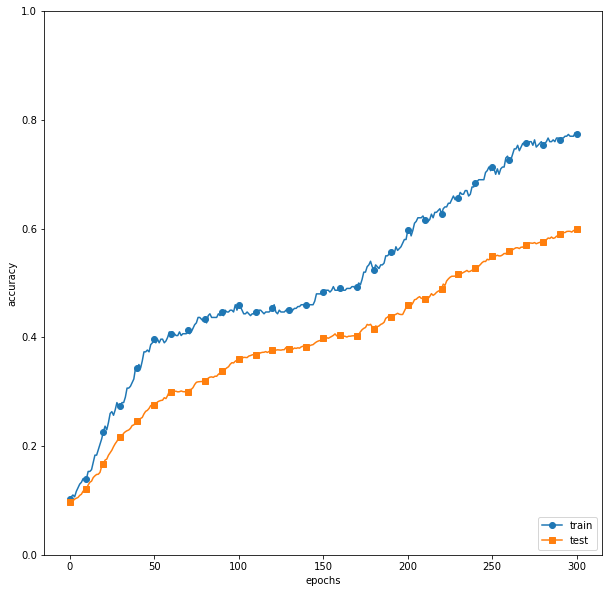

In [10]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/overfit_dropout.py

# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()